In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df =df.drop('customerID',axis='columns')
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [6]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df1 = df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [9]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\ram\AppData\Local\Temp\ipykernel_8528\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [11]:
df1.TotalCharges.dtypes

dtype('float64')

# data visualization


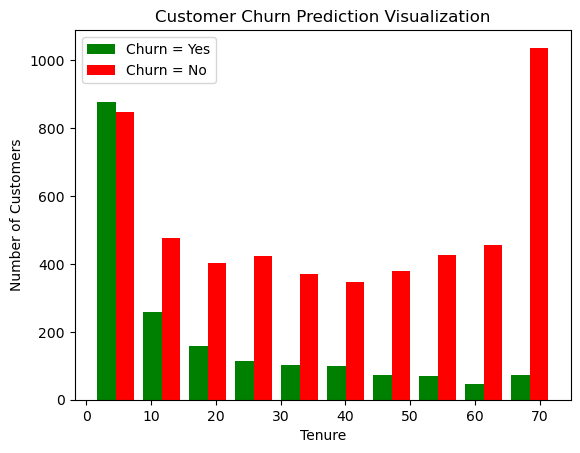

In [12]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([tenure_churn_yes,tenure_churn_no], color =['green','red'],label =['Churn = Yes', 'Churn = No'])
plt.legend()

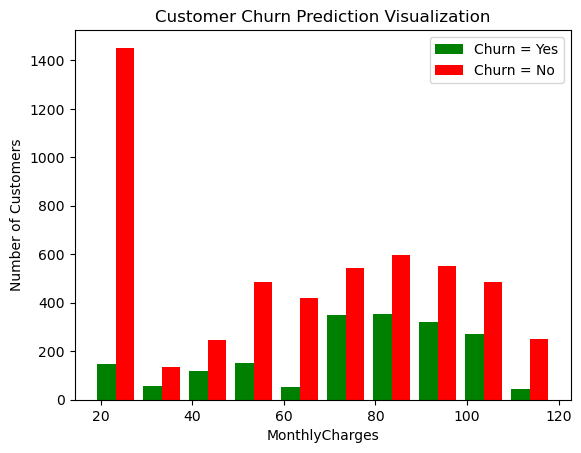

In [13]:
tenure_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
tenure_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel('MonthlyCharges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([tenure_churn_yes,tenure_churn_no], color =['green','red'],label =['Churn = Yes', 'Churn = No'])
plt.legend()

In [14]:
def print_unique_col_value(df):
    for column in df:
        if df[column].dtypes =='object':
            print(f'{column} : {df[column].unique()}')

In [15]:
print_unique_col_value(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [16]:
df1.replace('No internet service' ,'No',inplace = True)
df1.replace('No phone service' ,'No',inplace = True)

C:\Users\ram\AppData\Local\Temp\ipykernel_8528\1415623490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service' ,'No',inplace = True)
C:\Users\ram\AppData\Local\Temp\ipykernel_8528\1415623490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service' ,'No',inplace = True)


In [17]:
print_unique_col_value(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [18]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                  'StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes' : 1 ,'No' : 0},inplace = True)

C:\Users\ram\AppData\Local\Temp\ipykernel_8528\2632886845.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes' : 1 ,'No' : 0},inplace = True)


In [19]:
for col in df1:
    print(f'{col} : {df1[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [20]:
df1['gender'].replace({'Female' :1, 'Male' : 0}, inplace = True)

C:\Users\ram\AppData\Local\Temp\ipykernel_8528\3261512415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female' :1, 'Male' : 0}, inplace = True)


In [21]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [22]:
df2 = pd.get_dummies(data= df1, columns = ['InternetService','Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [23]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
329,1,1,0,0,17,1,1,0,0,1,...,0,1,0,1,0,0,0,1,0,0
5646,0,0,0,1,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
6059,1,0,0,0,39,0,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
6965,1,1,1,0,61,1,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0


In [24]:
df2.dtypes


gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [25]:
col_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])

In [26]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3784,0,1,0,0,0.478873,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
5267,0,1,1,0,0.112676,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
776,1,0,1,1,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1


In [27]:
for col in df2:
    print(f'{col} : {df2[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [28]:
x = df2.drop('Churn',axis = 'columns')
y = df2['Churn']

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 5)

In [30]:
x_train.shape

(5625, 26)

In [31]:
x_test.shape

(1407, 26)

In [32]:
x_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [33]:
len(x_train.columns)

26

In [34]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20,input_shape = (26,), activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train,y_train,epochs= 100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5815 - accuracy: 0.6908
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4449 - accuracy: 0.7900
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4240 - accuracy: 0.7984
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4177 - accuracy: 0.8028
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4148 - accuracy: 0.8030
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8076
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8091
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.8103
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8085
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4081 - accura

176/176 [==============================] - 0s 3ms/step - loss: 0.3824 - accuracy: 0.8222
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3828 - accuracy: 0.8203
Epoch 83/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3821 - accuracy: 0.8222
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3825 - accuracy: 0.8208
Epoch 85/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3819 - accuracy: 0.8222
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3825 - accuracy: 0.8228
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3815 - accuracy: 0.8210
Epoch 88/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3816 - accuracy: 0.8215
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3811 - accuracy: 0.8245
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3812 - accuracy: 

In [35]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4521 - accuracy: 0.7910


[0.4520770013332367, 0.7910447716712952]

In [36]:
yp = model.predict(x_test)
yp[:10]

44/44 [==============================] - 0s 1ms/step


array([[0.4698446 ],
       [0.5027602 ],
       [0.00604412],
       [0.8390148 ],
       [0.60889983],
       [0.90309393],
       [0.13631782],
       [0.4583132 ],
       [0.30357635],
       [0.11289515]], dtype=float32)

In [37]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [38]:
y_pred = []
for element in yp:
    if element >0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [39]:
y_pred[:10]

[0, 1, 0, 1, 1, 1, 0, 0, 0, 0]

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       999
           1       0.66      0.57      0.61       408

    accuracy                           0.79      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.78      0.79      0.79      1407



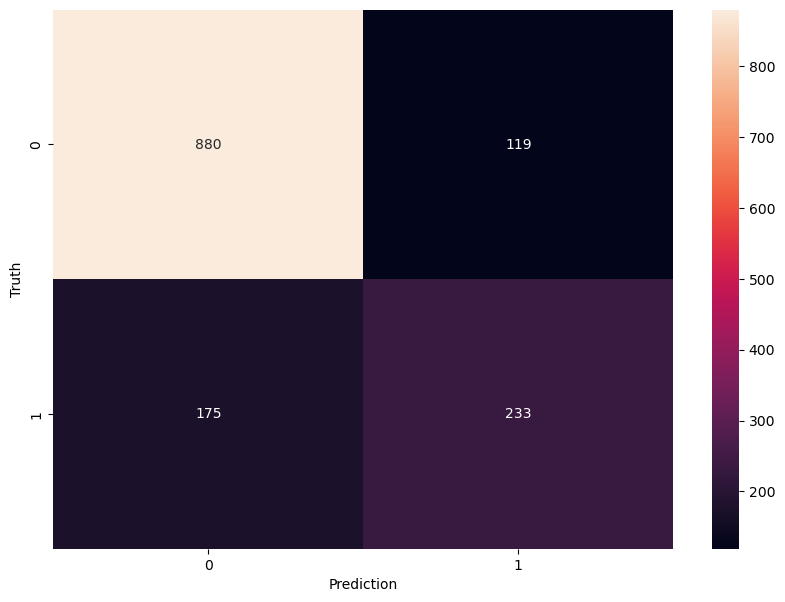

In [41]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d') 
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()  # 

In [42]:
round((862+229)/(862+229+137+179),2)

0.78

# Handling the imbalanced dataset

# Method1: Undersampling

In [45]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [49]:
count_class_0, count_class_1

(5163, 1869)

In [50]:
df_class_0.shape

(5163, 27)

In [51]:
df_class_1.shape

(1869, 27)

In [58]:
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under, df_class_1], axis = 0)

df_test_under.shape

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [59]:
x = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 15, stratify = y)

In [61]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [62]:
def ANN(x_train, y_train, x_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(x_train, y_train, epochs=100)
    else:
        model.fit(x_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(x_test, y_test))
    
    y_preds = model.predict(x_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [64]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6436 - accuracy: 0.6502
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5167 - accuracy: 0.7575
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4939 - accuracy: 0.7619
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.7712
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.7679
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4806 - accuracy: 0.7682
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4786 - accuracy: 0.7686
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.7719
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4770 - accuracy: 0.7732
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.7706
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.3916 - accuracy: 0.8177
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.8157
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3921 - accuracy: 0.8187
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3904 - accuracy: 0.8201
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8244
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3888 - accuracy: 0.8191
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3885 - accuracy: 0.8221
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3877 - accuracy: 0.8247
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3872 - accuracy: 0.8251
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3855 - accuracy: 0.8184
Epoch 93/100


# Method2: Oversampling


In [66]:
count_class_0, count_class_1

(5163, 1869)

In [74]:
df_class1_over = df_class_1.sample(count_class_0,replace = True)
df_test_over = pd.concat([df_class_0, df_class1_over],axis=0)
df_test_over.shape

(10326, 27)

In [75]:
x = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 15, stratify = y)

In [76]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [77]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 3ms/step - loss: 0.5448 - accuracy: 0.7312
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4874 - accuracy: 0.7636
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4810 - accuracy: 0.7639
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4754 - accuracy: 0.7694
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4702 - accuracy: 0.7748
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4664 - accuracy: 0.7752
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4626 - accuracy: 0.7763
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4604 - accuracy: 0.7817
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4574 - accuracy: 0.7820
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4541 - accura

259/259 [==============================] - 1s 3ms/step - loss: 0.3679 - accuracy: 0.8384
Epoch 82/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3675 - accuracy: 0.8378
Epoch 83/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3677 - accuracy: 0.8408
Epoch 84/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3665 - accuracy: 0.8377
Epoch 85/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3662 - accuracy: 0.8375
Epoch 86/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3643 - accuracy: 0.8366
Epoch 87/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3640 - accuracy: 0.8398
Epoch 88/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3635 - accuracy: 0.8381
Epoch 89/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3614 - accuracy: 0.8431
Epoch 90/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3608 - accuracy: 


# Method3: Smote

In [79]:
x = df2.drop('Churn', axis= 'columns')
y=  df2['Churn']

In [84]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [102]:
from imblearn.over_sampling import SMOTE
import pandas as pd  # Import Pandas if not already imported

smote = SMOTE(sampling_strategy='minority')
x_sn, y_sn = smote.fit_resample(x, y)

y_sn.value_counts()


0    5163
1    5163
Name: Churn, dtype: int64

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sn,y_sn,test_size = 0.2, random_state = 15, stratify = y_sn)

In [105]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [106]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [107]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 3ms/step - loss: 0.5617 - accuracy: 0.7085
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4717 - accuracy: 0.7736
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4615 - accuracy: 0.7808
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4552 - accuracy: 0.7827
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4510 - accuracy: 0.7847
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4472 - accuracy: 0.7878
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4446 - accuracy: 0.7907
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4410 - accuracy: 0.7933
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4369 - accuracy: 0.7959
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4342 - accura

259/259 [==============================] - 1s 4ms/step - loss: 0.3405 - accuracy: 0.8498
Epoch 82/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3397 - accuracy: 0.8500
Epoch 83/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3378 - accuracy: 0.8501
Epoch 84/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3371 - accuracy: 0.8523
Epoch 85/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3392 - accuracy: 0.8484
Epoch 86/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3384 - accuracy: 0.8488
Epoch 87/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3390 - accuracy: 0.8515
Epoch 88/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3390 - accuracy: 0.8478
Epoch 89/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3364 - accuracy: 0.8519
Epoch 90/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3378 - accuracy: 

# Method4: Ensemble


In [113]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [115]:
x = df2.drop('Churn',axis = 'columns')
y = df2['Churn']

In [116]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 15, stratify = y)

In [117]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [119]:
4130/3

1376.6666666666667

In [124]:
df3 = x_train.copy()
df3['Churn'] = y_train

In [126]:
df3_class0 = df3[df3.Churn == 0]
df3_class1 = df3[df3.Churn == 1]

In [128]:
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [134]:
def get_train_batch(df_majority,df_minority, start, end):
    df_train = pd.concat([df_majority[start:end],df_minority],axis = 0)
    
    x_train = df2.drop('Churn',axis = 'columns')
    y_train = df2['Churn']
    
    return x_train,y_train

In [137]:
x_train,y_train = get_train_batch(df3_class0,df3_class1,0,1495)
y_pred1 = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy', -1)

Epoch 1/100
220/220 [==============================] - 2s 3ms/step - loss: 0.4651 - accuracy: 0.7710
Epoch 2/100
220/220 [==============================] - 1s 2ms/step - loss: 0.4261 - accuracy: 0.7975
Epoch 3/100
220/220 [==============================] - 0s 2ms/step - loss: 0.4219 - accuracy: 0.8035
Epoch 4/100
220/220 [==============================] - 1s 3ms/step - loss: 0.4184 - accuracy: 0.8065
Epoch 5/100
220/220 [==============================] - 1s 2ms/step - loss: 0.4163 - accuracy: 0.8060
Epoch 6/100
220/220 [==============================] - 1s 4ms/step - loss: 0.4153 - accuracy: 0.8080
Epoch 7/100
220/220 [==============================] - 1s 2ms/step - loss: 0.4139 - accuracy: 0.8077
Epoch 8/100
220/220 [==============================] - 1s 2ms/step - loss: 0.4123 - accuracy: 0.8079
Epoch 9/100
220/220 [==============================] - 1s 3ms/step - loss: 0.4114 - accuracy: 0.8087
Epoch 10/100
220/220 [==============================] - 1s 2ms/step - loss: 0.4098 - accura

220/220 [==============================] - 0s 2ms/step - loss: 0.3711 - accuracy: 0.8248
Epoch 82/100
220/220 [==============================] - 0s 2ms/step - loss: 0.3716 - accuracy: 0.8237
Epoch 83/100
220/220 [==============================] - 0s 2ms/step - loss: 0.3711 - accuracy: 0.8235
Epoch 84/100
220/220 [==============================] - 0s 2ms/step - loss: 0.3704 - accuracy: 0.8247
Epoch 85/100
220/220 [==============================] - 0s 2ms/step - loss: 0.3698 - accuracy: 0.8262
Epoch 86/100
220/220 [==============================] - 0s 2ms/step - loss: 0.3705 - accuracy: 0.8249
Epoch 87/100
220/220 [==============================] - 0s 2ms/step - loss: 0.3703 - accuracy: 0.8268
Epoch 88/100
220/220 [==============================] - 0s 2ms/step - loss: 0.3687 - accuracy: 0.8251
Epoch 89/100
220/220 [==============================] - 0s 2ms/step - loss: 0.3690 - accuracy: 0.8251
Epoch 90/100
220/220 [==============================] - 0s 2ms/step - loss: 0.3679 - accuracy: 

In [143]:
x_train,y_train = get_train_batch(df3_class0,df3_class1,1495,2990)
y_pred2 = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy', -1)

Epoch 1/100
220/220 [==============================] - 2s 2ms/step - loss: 0.4804 - accuracy: 0.7685
Epoch 2/100
220/220 [==============================] - 1s 3ms/step - loss: 0.4282 - accuracy: 0.7937
Epoch 3/100
220/220 [==============================] - 1s 2ms/step - loss: 0.4241 - accuracy: 0.7935
Epoch 4/100
220/220 [==============================] - 1s 2ms/step - loss: 0.4207 - accuracy: 0.8015
Epoch 5/100
220/220 [==============================] - 1s 3ms/step - loss: 0.4176 - accuracy: 0.8022
Epoch 6/100
220/220 [==============================] - 1s 2ms/step - loss: 0.4159 - accuracy: 0.8030
Epoch 7/100
220/220 [==============================] - 1s 3ms/step - loss: 0.4149 - accuracy: 0.8032
Epoch 8/100
220/220 [==============================] - 1s 3ms/step - loss: 0.4133 - accuracy: 0.8063
Epoch 9/100
220/220 [==============================] - 1s 3ms/step - loss: 0.4123 - accuracy: 0.8066
Epoch 10/100
220/220 [==============================] - 1s 3ms/step - loss: 0.4112 - accura

220/220 [==============================] - 0s 2ms/step - loss: 0.3695 - accuracy: 0.8245
Epoch 82/100
220/220 [==============================] - 0s 2ms/step - loss: 0.3687 - accuracy: 0.8239
Epoch 83/100
220/220 [==============================] - 1s 4ms/step - loss: 0.3671 - accuracy: 0.8261
Epoch 84/100
220/220 [==============================] - 1s 4ms/step - loss: 0.3681 - accuracy: 0.8257
Epoch 85/100
220/220 [==============================] - 1s 4ms/step - loss: 0.3680 - accuracy: 0.8275
Epoch 86/100
220/220 [==============================] - 1s 3ms/step - loss: 0.3668 - accuracy: 0.8272
Epoch 87/100
220/220 [==============================] - 1s 4ms/step - loss: 0.3659 - accuracy: 0.8264
Epoch 88/100
220/220 [==============================] - 0s 2ms/step - loss: 0.3646 - accuracy: 0.8275
Epoch 89/100
220/220 [==============================] - 0s 2ms/step - loss: 0.3666 - accuracy: 0.8275
Epoch 90/100
220/220 [==============================] - 0s 2ms/step - loss: 0.3645 - accuracy: 

In [144]:
x_train,y_train = get_train_batch(df3_class0,df3_class1,2990,4130)
y_pred3 = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy', -1)

Epoch 1/100
220/220 [==============================] - 1s 2ms/step - loss: 0.5346 - accuracy: 0.7180
Epoch 2/100
220/220 [==============================] - 1s 2ms/step - loss: 0.4322 - accuracy: 0.7911
Epoch 3/100
220/220 [==============================] - 1s 2ms/step - loss: 0.4224 - accuracy: 0.8028
Epoch 4/100
220/220 [==============================] - 1s 2ms/step - loss: 0.4181 - accuracy: 0.8011
Epoch 5/100
220/220 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8045
Epoch 6/100
220/220 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8063
Epoch 7/100
220/220 [==============================] - 1s 3ms/step - loss: 0.4122 - accuracy: 0.8062
Epoch 8/100
220/220 [==============================] - 1s 3ms/step - loss: 0.4099 - accuracy: 0.8073
Epoch 9/100
220/220 [==============================] - 1s 2ms/step - loss: 0.4091 - accuracy: 0.8075
Epoch 10/100
220/220 [==============================] - 1s 2ms/step - loss: 0.4088 - accura

220/220 [==============================] - 0s 2ms/step - loss: 0.3645 - accuracy: 0.8281
Epoch 82/100
220/220 [==============================] - 1s 3ms/step - loss: 0.3655 - accuracy: 0.8303
Epoch 83/100
220/220 [==============================] - 1s 3ms/step - loss: 0.3647 - accuracy: 0.8309
Epoch 84/100
220/220 [==============================] - 0s 2ms/step - loss: 0.3645 - accuracy: 0.8318
Epoch 85/100
220/220 [==============================] - 1s 3ms/step - loss: 0.3636 - accuracy: 0.8308
Epoch 86/100
220/220 [==============================] - 1s 2ms/step - loss: 0.3636 - accuracy: 0.8326
Epoch 87/100
220/220 [==============================] - 1s 3ms/step - loss: 0.3631 - accuracy: 0.8319
Epoch 88/100
220/220 [==============================] - 1s 3ms/step - loss: 0.3634 - accuracy: 0.8330
Epoch 89/100
220/220 [==============================] - 1s 3ms/step - loss: 0.3623 - accuracy: 0.8319
Epoch 90/100
220/220 [==============================] - 1s 3ms/step - loss: 0.3628 - accuracy: 

In [146]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [147]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1033
           1       0.74      0.64      0.68       374

    accuracy                           0.84      1407
   macro avg       0.81      0.78      0.79      1407
weighted avg       0.84      0.84      0.84      1407

